In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from yellowbrick.model_selection import learning_curve


In [19]:
data = pd.read_csv('data_5.csv')
data = data.drop('Unnamed: 0', axis = 1)

df = data.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719 entries, 0 to 5718
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            5719 non-null   object 
 1   ETP journali�re (mm)            5719 non-null   float64
 2   Temperature (MAX) (�C)          5719 non-null   float64
 3   Temperature (MIN) (�C)          5719 non-null   float64
 4   Temperature (MOY) (�C)          5719 non-null   float64
 5   Relative Humidity (MAX) (% RH)  5719 non-null   float64
 6   Relative Humidity (MIN) (% RH)  5719 non-null   float64
 7   Relative Humidity (MOY) (% RH)  5719 non-null   float64
 8   Pyranometer (SOM) (W/m�)        5719 non-null   float64
dtypes: float64(8), object(1)
memory usage: 402.2+ KB


In [21]:
def scoring(model):
    print('score train =', model.score(X_train, y_train))

    print('score test =', model.score(X_test, y_test))

    R2_adjusted = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    print("R2 adjusted =", R2_adjusted)

    y_pred = model.predict(X_test)

    print("MAE = ", mean_absolute_error(y_test, y_pred)) 
    print("MSE = ", mean_squared_error(y_test, y_pred))

    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print("R2 = ",r2_score(y_test,y_pred))

# T moy, H moy

## LinearRegression

In [22]:
X = data[['Relative Humidity (MOY) (% RH)',
       'Temperature (MOY) (�C)']]
y = data['ETP journali�re (mm)']

X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=3)

In [23]:
def model_pipeline(model):
    return Pipeline([('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=2)),
                  ('linear', model)])

"""model = Pipeline([('scaler', StandardScaler()),
                  ('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())])
"""


model = model_pipeline(LinearRegression())

In [24]:
model.fit(X_train, y_train)
 
scoring(model)

score train = 0.7662925156774072
score test = 0.7786581859846284
R2 adjusted = 0.7784256840791501
MAE =  0.6547978217989211
MSE =  0.6762664330701924
RMSE =  0.8223542017100615
R2 =  0.7786581859846284


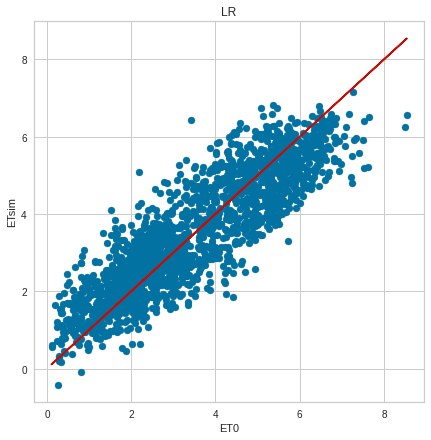

In [25]:
def plot_dist(model, label):
        y_pred = model.predict(X_test)
        plt.figure(figsize=(7, 7))
        plt.title(label)
        plt.scatter(y_test,y_pred)
        plt.plot(y_test,y_test,'r')
        plt.xlabel("ET0")
        plt.ylabel("ETsim")
        plt.show()

    plot_dist(model, 'LR')

In [29]:
model.predict([[43.4,  26.07]])[0]

/home/omar/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5.699522875000056

In [17]:
df

,Date,ETP journali�re (mm),Temperature (MAX) (�C),Temperature (MIN) (�C),Temperature (MOY) (�C),Relative Humidity (MAX) (% RH),Relative Humidity (MIN) (% RH),Relative Humidity (MOY) (% RH),Pyranometer (SOM) (W/m�)
0,2018-01-01,1.45,18.0,4.2,9.0,100.0,19.6,71.6,14372.90
1,2018-02-01,1.85,18.4,3.7,10.0,62.2,17.4,38.2,14703.10
2,2018-03-01,2.07,17.4,4.4,10.0,75.1,35.8,53.1,14371.80
3,2018-04-01,1.92,17.9,5.3,10.9,85.1,39.2,60.5,14445.20
4,2018-05-01,1.92,16.7,5.6,11.9,99.3,32.2,61.3,14525.00
...,...,...,...,...,...,...,...,...,...
5714,2022-06-06,6.23,32.9,15.3,24.8,77.5,31.6,50.2,32504.07
5715,2022-07-06,6.46,33.4,17.9,25.9,71.3,30.6,48.2,31790.08
5716,2022-08-06,6.84,32.9,17.3,24.9,72.0,19.8,44.9,34094.03
5717,2022-09-06,6.68,35.4,16.1,26.4,69.5,20.0,42.6,33858.07


## SVR

In [ ]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

modelsvr = SVR()

grids = GridSearchCV(modelsvr,param,cv=2)

grids.fit(X_train,y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grids.best_estimator_)
print("\n The best score across ALL searched params:\n",grids.best_score_)
print("\n The best parameters across ALL searched params:\n",grids.best_params_)

In [ ]:
scoring(grid_GBR.best_estimator_)

## GradientBoostingRegressor

In [297]:
GBR =  model_pipeline(GradientBoostingRegressor())

parameters = {'linear__learning_rate': [0.01,0.02,0.03,0.04],
                  'linear__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'linear__n_estimators' : [100,500,1000, 1500],
                  'linear__max_depth'    : [4,6,8,10]
                 }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'linear__learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'linear__max_depth': [4, 6, 8, 10],
                         'linear__n_estimators': [100, 500, 1000, 1500],
                         'linear__subsample': [0.9, 0.5, 0.2, 0.1]})

In [298]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.1))])

 The best score across ALL searched params:
 0.7710167387376226

 The best parameters across ALL searched params:
 {'linear__learning_rate': 0.01, 'linear__max_depth': 4, 'linear__n_estimators': 500, 'linear__subsample': 0.1}


In [299]:
scoring(grid_GBR.best_estimator_)

score train = 0.7994777849799746
score test = 0.7894705479888635
R2 adjusted = 0.7892494036064989
MAE =  0.6301846254120836
MSE =  0.6432313849108783
RMSE =  0.8020170727053623
R2 =  0.7894705479888635


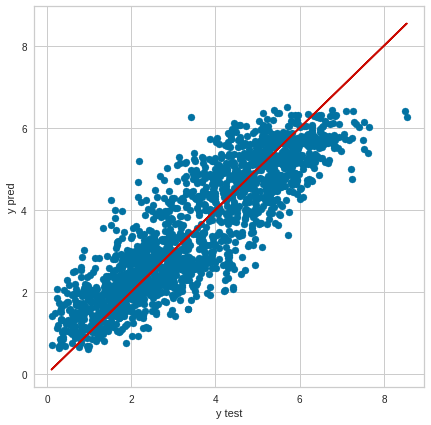

In [301]:
plot_dist(grid_GBR.best_estimator_)

score train = 0.7976143007652196
score test = 0.7894287166838467
R2 adjusted = 0.7892075283610356
MAE =  0.6338743765023407
MSE =  0.643359192246154
RMSE =  0.8020967474352169
R2 =  0.7894287166838467


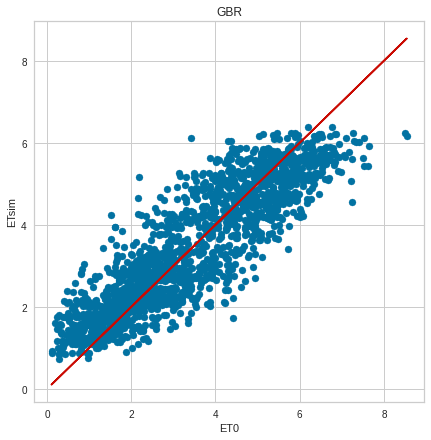

In [29]:
model_GBR = model_pipeline(GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5))

model_GBR.fit(X_train, y_train)

scoring(model_GBR)

plot_dist(model_GBR, 'GBR')


## RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [304]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'linear__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'linear__max_features': ['auto', 'sqrt'],
               'linear__max_depth': max_depth,
               'linear__min_samples_split': [2, 5, 10],
               'linear__min_samples_leaf': [1, 2, 4],
               'linear__bootstrap': [True, False]}

In [305]:
model = model_pipeline(RandomForestRegressor())

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

[CV] END linear__bootstrap=True, linear__max_depth=30, linear__max_features=sqrt, linear__min_samples_leaf=1, linear__min_samples_split=5, linear__n_estimators=400; total time=   2.8s
[CV] END linear__bootstrap=True, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=1, linear__min_samples_split=5, linear__n_estimators=2000; total time=  11.9s
[CV] END linear__bootstrap=False, linear__max_depth=30, linear__max_features=auto, linear__min_samples_leaf=4, linear__min_samples_split=2, linear__n_estimators=2000; total time=  37.6s
[CV] END linear__bootstrap=False, linear__max_depth=30, linear__max_features=sqrt, linear__min_samples_leaf=4, linear__min_samples_split=5, linear__n_estimators=800; total time=   5.4s
[CV] END linear__bootstrap=False, linear__max_depth=60, linear__max_features=sqrt, linear__min_samples_leaf=1, linear__min_samples_split=5, linear__n_estimators=600; total time=   4.9s
[CV] END linear__bootstrap=False, linear__max_depth=60, linear__max_feature

/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

[CV] END linear__bootstrap=True, linear__max_depth=30, linear__max_features=sqrt, linear__min_samples_leaf=1, linear__min_samples_split=5, linear__n_estimators=400; total time=   2.8s
[CV] END linear__bootstrap=False, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=2, linear__min_samples_split=5, linear__n_estimators=1200; total time=   7.7s
[CV] END linear__bootstrap=False, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=2, linear__min_samples_split=5, linear__n_estimators=1200; total time=   8.7s
[CV] END linear__bootstrap=False, linear__max_depth=30, linear__max_features=auto, linear__min_samples_leaf=4, linear__min_samples_split=2, linear__n_estimators=2000; total time=  34.8s
[CV] END linear__bootstrap=False, linear__max_depth=100, linear__max_features=sqrt, linear__min_samples_leaf=2, linear__min_samples_split=5, linear__n_estimators=1000; total time=   7.9s
[CV] END linear__bootstrap=False, linear__max_depth=60, linear__max_fea

/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

[CV] END linear__bootstrap=True, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=1, linear__min_samples_split=5, linear__n_estimators=2000; total time=  12.2s
[CV] END linear__bootstrap=False, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=2, linear__min_samples_split=5, linear__n_estimators=1200; total time=   8.1s
[CV] END linear__bootstrap=True, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=4, linear__min_samples_split=2, linear__n_estimators=1600; total time=  13.3s
[CV] END linear__bootstrap=True, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=4, linear__min_samples_split=2, linear__n_estimators=1600; total time=   9.7s
[CV] END linear__bootstrap=True, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=4, linear__min_samples_split=2, linear__n_estimators=1600; total time=   8.2s
[CV] END linear__bootstrap=False, linear__max_depth=30, linear__max_featur

/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('poly', PolynomialFeatures()),
                                             ('linear',
                                              RandomForestRegressor())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'linear__bootstrap': [True, False],
                                        'linear__max_depth': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              90, 100, 110,
                                                              None],
                                        'linear__max_features': ['auto',
                                                                 'sqrt'],
                                        'linear__min_samples_leaf': [1, 2, 4],
                                        'linear__min_samples_split': [2, 5, 10],
                                        'linear__n_estimators': [200, 400, 600,
                                                                 800, 1000,
                                                                 1200, 1400,
                                                                 1600, 1800,
                                                                 2000]},
                   random_state=42, verbose=2)

In [306]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",rf_random.best_estimator_)
print("\n The best score across ALL searched params:\n",rf_random.best_score_)
print("\n The best parameters across ALL searched params:\n",rf_random.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       min_samples_leaf=2, min_samples_split=10,
                                       n_estimators=1000))])

 The best score across ALL searched params:
 0.7672531995471573

 The best parameters across ALL searched params:
 {'linear__n_estimators': 1000, 'linear__min_samples_split': 10, 'linear__min_samples_leaf': 2, 'linear__max_features': 'sqrt', 'linear__max_depth': 10, 'linear__bootstrap': True}


In [308]:
scoring(rf_random.best_estimator_)

score train = 0.846494716883546
score test = 0.7869159633188558
R2 adjusted = 0.7866921355492328
MAE =  0.6310480626776571
MSE =  0.6510364165559247
RMSE =  0.8068682770786845
R2 =  0.7869159633188558


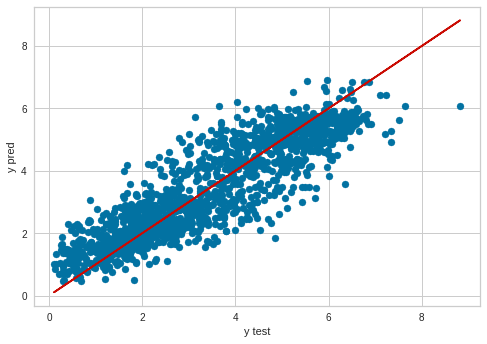

[CV] END linear__bootstrap=True, linear__max_depth=100, linear__max_features=sqrt, linear__min_samples_leaf=1, linear__min_samples_split=5, linear__n_estimators=400; total time=   2.1s
[CV] END linear__bootstrap=True, linear__max_depth=80, linear__max_features=sqrt, linear__min_samples_leaf=4, linear__min_samples_split=2, linear__n_estimators=1600; total time=   8.4s
[CV] END linear__bootstrap=True, linear__max_depth=10, linear__max_features=sqrt, linear__min_samples_leaf=2, linear__min_samples_split=10, linear__n_estimators=1000; total time=   4.3s
[CV] END linear__bootstrap=True, linear__max_depth=110, linear__max_features=sqrt, linear__min_samples_leaf=1, linear__min_samples_split=10, linear__n_estimators=600; total time=   2.9s
[CV] END linear__bootstrap=False, linear__max_depth=None, linear__max_features=sqrt, linear__min_samples_leaf=4, linear__min_samples_split=5, linear__n_estimators=2000; total time=  11.0s
[CV] END linear__bootstrap=True, linear__max_depth=40, linear__max_fea

[CV] END linear__bootstrap=False, linear__max_depth=60, linear__max_features=sqrt, linear__min_samples_leaf=4, linear__min_samples_split=2, linear__n_estimators=600; total time=   3.5s
[CV] END linear__bootstrap=True, linear__max_depth=10, linear__max_features=auto, linear__min_samples_leaf=1, linear__min_samples_split=5, linear__n_estimators=1600; total time=  13.1s
[CV] END linear__bootstrap=True, linear__max_depth=80, linear__max_features=auto, linear__min_samples_leaf=2, linear__min_samples_split=2, linear__n_estimators=1800; total time=  17.4s
[CV] END linear__bootstrap=True, linear__max_depth=100, linear__max_features=auto, linear__min_samples_leaf=1, linear__min_samples_split=2, linear__n_estimators=1400; total time=  15.4s
[CV] END linear__bootstrap=False, linear__max_depth=None, linear__max_features=auto, linear__min_samples_leaf=2, linear__min_samples_split=10, linear__n_estimators=1200; total time=  15.0s
[CV] END linear__bootstrap=True, linear__max_depth=20, linear__max_fea

In [140]:
plot_dist(rf_random.best_estimator_)

score train = 0.8426766842589792
score test = 0.7870131625645271
R2 adjusted = 0.7867894368949521
MAE =  0.6310743619535853
MSE =  0.6507394433542744
RMSE =  0.8066842277832599
R2 =  0.7870131625645271


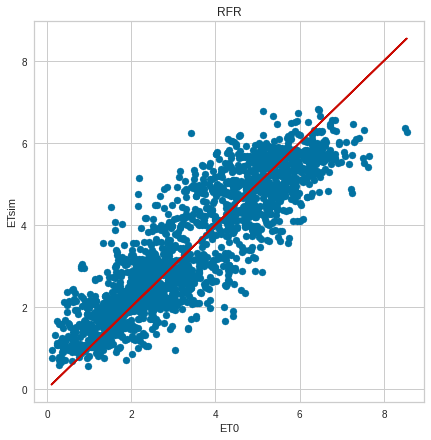

In [31]:
model_RFR = model_pipeline( RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=1600))

model_RFR.fit(X_train, y_train)

scoring(model_RFR)

plot_dist(model_RFR, 'RFR')


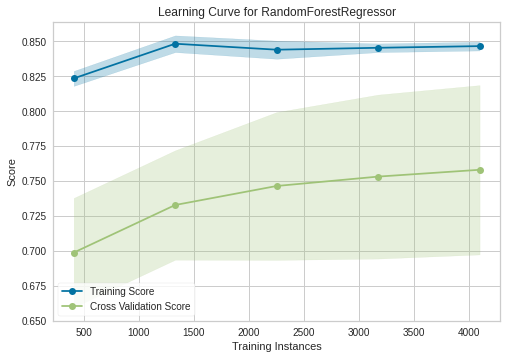

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [39]:
visualizer = learning_curve(model_RFR, X, y, cv=10, scoring= 'r2')
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show() 

## DecisionTreeRegressor

In [310]:
model_DTR = model_pipeline(DecisionTreeRegressor())

param_grid = {"linear__criterion": ["mse", "mae"],
              "linear__min_samples_split": [10, 20, 40],
              "linear__max_depth": [2, 6, 8],
              "linear__min_samples_leaf": [20, 40, 100],
              "linear__max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtm = GridSearchCV(model_DTR, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklea

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear', DecisionTreeRegressor())]),
             param_grid={'linear__criterion': ['mse', 'mae'],
                         'linear__max_depth': [2, 6, 8],
                         'linear__max_leaf_nodes': [5, 20, 100],
                         'linear__min_samples_leaf': [20, 40, 100],
                         'linear__min_samples_split': [10, 20, 40]})

In [311]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_cv_dtm.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_cv_dtm.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_cv_dtm.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear',
                 DecisionTreeRegressor(criterion='mse', max_depth=6,
                                       max_leaf_nodes=100, min_samples_leaf=40,
                                       min_samples_split=10))])

 The best score across ALL searched params:
 0.7676691398308421

 The best parameters across ALL searched params:
 {'linear__criterion': 'mse', 'linear__max_depth': 6, 'linear__max_leaf_nodes': 100, 'linear__min_samples_leaf': 40, 'linear__min_samples_split': 10}


In [312]:
scoring(grid_cv_dtm)

score train = 0.7904658651598757
score test = 0.7854656990185337
R2 adjusted = 0.7852403478620406
MAE =  0.6326472969779947
MSE =  0.6554674142404369
RMSE =  0.8096094207952603
R2 =  0.7854656990185337


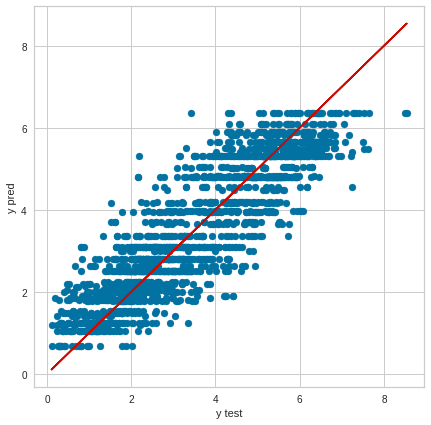

In [313]:
plot_dist(grid_cv_dtm)

/home/omar/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


score train = 0.7904658651598758
score test = 0.785488333725066
R2 adjusted = 0.7852630063445251
MAE =  0.6325019796306397
MSE =  0.6553982583409144
RMSE =  0.8095667102474721
R2 =  0.785488333725066


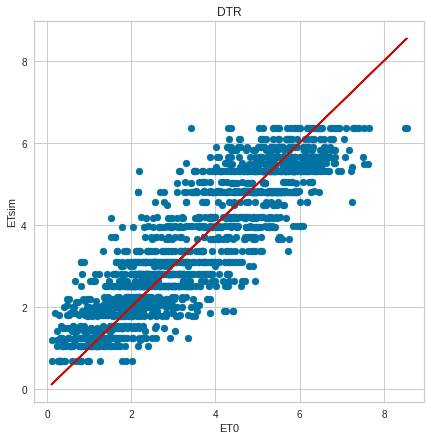

In [32]:
model_DTR = model_pipeline(DecisionTreeRegressor(criterion='mse', max_depth=6,
                                       max_leaf_nodes=100, min_samples_leaf=40,
                                       min_samples_split=40))

model_DTR.fit(X_train, y_train)

scoring(model_DTR)

plot_dist(model_DTR, 'DTR')


## SGDRegressor

In [315]:
model_SGDR = model_pipeline(SGDRegressor())

param_grid = {
    'linear__alpha': 10.0 ** -np.arange(1, 7),
    'linear__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'linear__penalty': ['l2', 'l1', 'elasticnet'],
    'linear__learning_rate': ['constant', 'optimal', 'invscaling'],
}

grid_SGDR = GridSearchCV(model_SGDR, param_grid)

grid_SGDR.fit(X_train, y_train)


/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear', SGDRegressor())]),
             param_grid={'linear__alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'linear__learning_rate': ['constant', 'optimal',
                                                   'invscaling'],
                         'linear__loss': ['squared_loss', 'huber',
                                          'epsilon_insensitive'],
                         'linear__penalty': ['l2', 'l1', 'elasticnet']})

In [316]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_SGDR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_SGDR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_SGDR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear',
                 SGDRegressor(alpha=1e-05, loss='squared_loss',
                              penalty='elasticnet'))])

 The best score across ALL searched params:
 0.7653920889959975

 The best parameters across ALL searched params:
 {'linear__alpha': 1e-05, 'linear__learning_rate': 'invscaling', 'linear__loss': 'squared_loss', 'linear__penalty': 'elasticnet'}


In [317]:
scoring(grid_cv_dtm)

score train = 0.7904658651598757
score test = 0.7854656990185337
R2 adjusted = 0.7852403478620406
MAE =  0.6326472969779947
MSE =  0.6554674142404369
RMSE =  0.8096094207952603
R2 =  0.7854656990185337


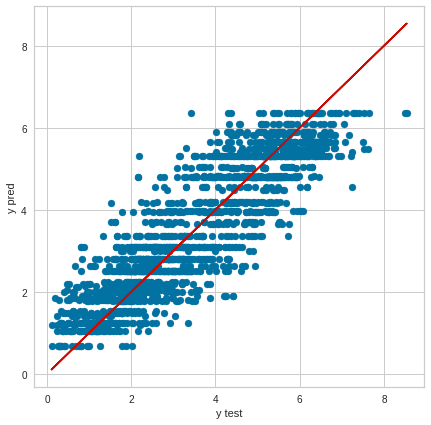

In [318]:
plot_dist(grid_cv_dtm)

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


score train = 0.7660395140369984
score test = 0.7782401895488846
R2 adjusted = 0.77800724857152
MAE =  0.656777018358234
MSE =  0.6775435390697705
RMSE =  0.8231303293341647
R2 =  0.7782401895488846


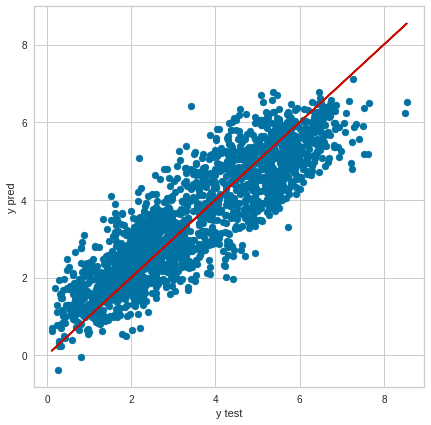

In [321]:
model_SGDR = model_pipeline( SGDRegressor(alpha=1e-05, loss='squared_loss',
                              penalty='elasticnet'))

model_SGDR.fit(X_train, y_train)

scoring(model_SGDR)

plot_dist(model_SGDR)


score train = 0.7650181224686566
score test = 0.777091649096105
R2 adjusted = 0.776857501668685
MAE =  0.6569565937041861
MSE =  0.6810526788077516
RMSE =  0.8252591585724763
R2 =  0.777091649096105


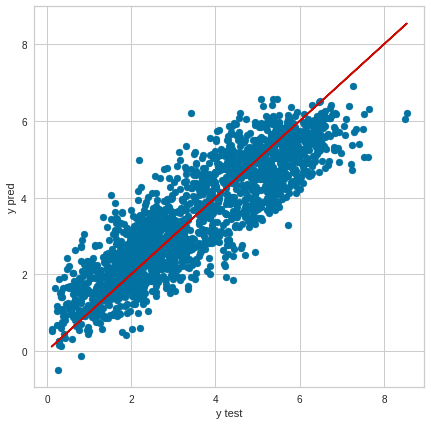

In [322]:
model_SGDR = model_pipeline(SGDRegressor())

model_SGDR.fit(X_train, y_train)

scoring(model_SGDR)

plot_dist(model_SGDR)


# T max, T min, H max, H min

In [329]:
X = df[['Temperature (MAX) (�C)',
       'Temperature (MIN) (�C)',
       'Relative Humidity (MAX) (% RH)', 
        'Relative Humidity (MIN) (% RH)']]
y = df['ETP journali�re (mm)']

X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=3)

## LinearRegression

score train = 0.7685320994329355
score test = 0.7747973227880912
R2 adjusted = 0.7743237104280241
MAE =  0.6571179009146443
MSE =  0.6880625421520169
RMSE =  0.8294953539062271
R2 =  0.7747973227880912


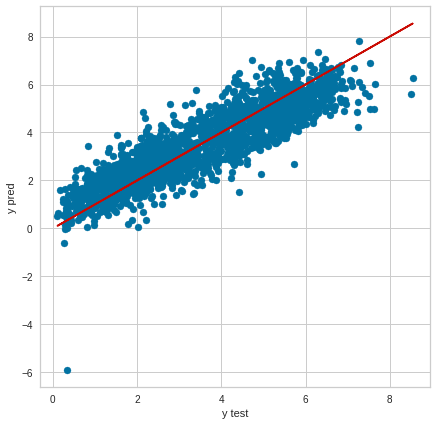

In [330]:
model_LR_2 = model_pipeline(LinearRegression())
model_LR_2.fit(X_train, y_train)
 
scoring(model_LR_2)

plot_dist(model_LR_2)

## GradientBoostingRegressor

In [331]:
GBR = model_pipeline(GradientBoostingRegressor())

parameters = {'linear__learning_rate': [0.01,0.02,0.03,0.04],
              'linear__subsample'    : [0.9, 0.5, 0.2, 0.1],
              'linear__n_estimators' : [100,500,1000, 1500],
              'linear__max_depth'    : [4,6,8,10]}

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'linear__learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'linear__max_depth': [4, 6, 8, 10],
                         'linear__n_estimators': [100, 500, 1000, 1500],
                         'linear__subsample': [0.9, 0.5, 0.2, 0.1]})

In [332]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.5))])

 The best score across ALL searched params:
 0.7792708866109729

 The best parameters across ALL searched params:
 {'linear__learning_rate': 0.01, 'linear__max_depth': 4, 'linear__n_estimators': 500, 'linear__subsample': 0.5}


score train = 0.8228974932307414
score test = 0.7930367729060432
R2 adjusted = 0.7926015190109981
MAE =  0.6264542897097722
MSE =  0.6323354852138621
RMSE =  0.7951952497430188
R2 =  0.7930367729060432


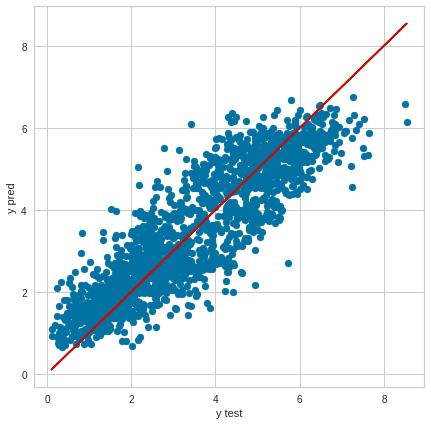

In [334]:
scoring(grid_GBR)

plot_dist(grid_GBR)

score train = 0.822914071899841
score test = 0.7935032679691998
R2 adjusted = 0.7930689951363274
MAE =  0.6252891938621697
MSE =  0.6309102011851344
RMSE =  0.7942985592238818
R2 =  0.7935032679691998


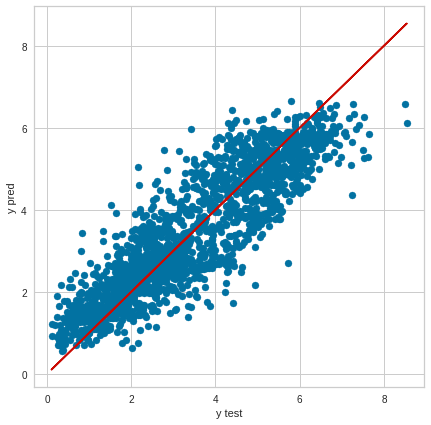

In [335]:
model_GBR_2 = model_pipeline(GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.5))
model_GBR_2.fit(X_train, y_train)

scoring(model_GBR_2)
plot_dist(model_GBR_2)

## SGDRegressor

score train = 0.7663851057238761
score test = 0.7767958740037253
R2 adjusted = 0.7763264646956364
MAE =  0.6573948589076425
MSE =  0.6819563615014367
RMSE =  0.8258064915592737
R2 =  0.7767958740037253


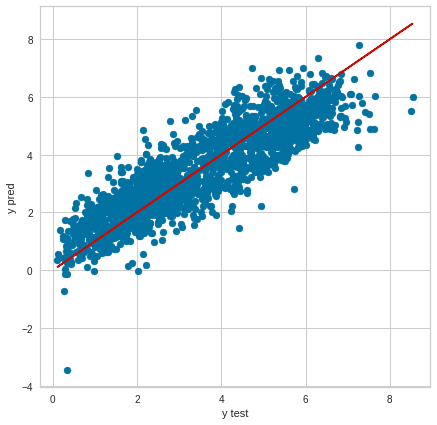

In [336]:
model_SGDR = model_pipeline(SGDRegressor())

model_SGDR.fit(X_train, y_train)

scoring(model_SGDR)

plot_dist(model_SGDR)


## Lasso 

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.790e+02, tolerance: 1.160e+00
  model = cd_fast.enet_coordinate_descent(


score train = 0.7685312933315136
score test = 0.77492921248561
R2 adjusted = 0.774455877496095
MAE =  0.6570325114587552
MSE =  0.6876595790892241
RMSE =  0.8292524218169183
R2 =  0.77492921248561


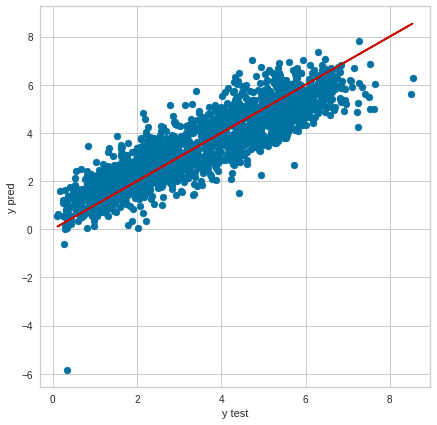

In [337]:
model_lasso = model_pipeline(Lasso(alpha=1e-5))
model_lasso.fit(X_train, y_train)

scoring(model_lasso)

plot_dist(model_lasso)

In [338]:
param = {'linear__alpha' : [1e-5, 0.01, 0.1, 0.5, 0.8, 1]}
grid_lasso = model_pipeline(Lasso())

grid_lasso = GridSearchCV(estimator=grid_lasso, param_grid = param, cv = 3, n_jobs=-1)
grid_lasso.fit(X_train, y_train)

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.559e+02, tolerance: 7.712e-01
  model = cd_fast.enet_coordinate_descent(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.357e+02, tolerance: 7.722e-01
  model = cd_fast.enet_coordinate_descent(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.540e+

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear', Lasso())]),
             n_jobs=-1,
             param_grid={'linear__alpha': [1e-05, 0.01, 0.1, 0.5, 0.8, 1]})

In [339]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lasso.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_lasso.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_lasso.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear', Lasso(alpha=1e-05))])

 The best score across ALL searched params:
 0.7654007442254184

 The best parameters across ALL searched params:
 {'linear__alpha': 1e-05}


/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.790e+02, tolerance: 1.160e+00
  model = cd_fast.enet_coordinate_descent(


score train = 0.7685312933315136
score test = 0.77492921248561
R2 adjusted = 0.774455877496095
MAE =  0.6570325114587552
MSE =  0.6876595790892241
RMSE =  0.8292524218169183
R2 =  0.77492921248561


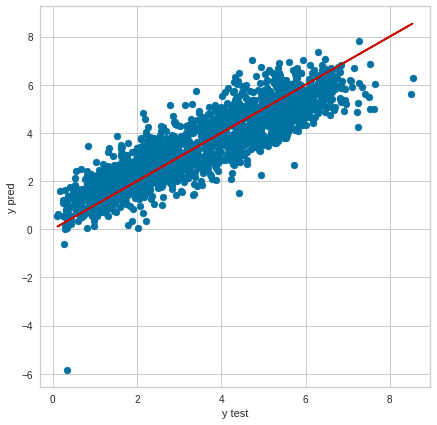

In [340]:
grid_model_lasso = model_pipeline(Lasso(alpha=1e-05))

grid_model_lasso.fit(X_train, y_train)

scoring(grid_model_lasso)
plot_dist(grid_model_lasso)

# T moy, H moy, Pyranometer

In [341]:
X = data[['Relative Humidity (MOY) (% RH)',
          'Temperature (MOY) (�C)',
          'Pyranometer (SOM) (W/m�)']]
y = data['ETP journali�re (mm)']

X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=2)

## LinearRegression

score train = 0.9295769668068428
score test = 0.9261722343500705
R2 adjusted = 0.9260558479617627
MAE =  0.2791077500389965
MSE =  0.2257494506842271
RMSE =  0.47513098266081016
R2 =  0.9261722343500705


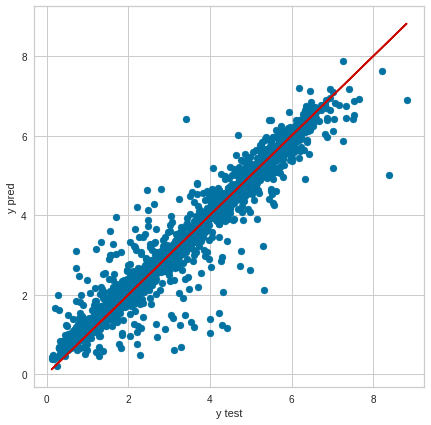

In [342]:
model_LR_3 = model_pipeline(LinearRegression())
model_LR_3.fit(X_train, y_train)
 
scoring(model_LR_3)

plot_dist(model_LR_3)

## GradientBoostingRegressor

In [343]:
GBR_3 = model_pipeline(GradientBoostingRegressor())

parameters = {'linear__learning_rate': [0.01,0.02,0.03,0.04],
              'linear__subsample'    : [0.9, 0.5, 0.2, 0.1],
              'linear__n_estimators' : [100,500,1000, 1500],
              'linear__max_depth'    : [4,6,8,10]
              }

grid_GBR_3 = GridSearchCV(estimator=GBR_3, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR_3.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'linear__learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'linear__max_depth': [4, 6, 8, 10],
                         'linear__n_estimators': [100, 500, 1000, 1500],
                         'linear__subsample': [0.9, 0.5, 0.2, 0.1]})

In [344]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR_3.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR_3.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR_3.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.2))])

 The best score across ALL searched params:
 0.9230002056919233

 The best parameters across ALL searched params:
 {'linear__learning_rate': 0.01, 'linear__max_depth': 4, 'linear__n_estimators': 500, 'linear__subsample': 0.2}


score train = 0.9418757529228015
score test = 0.9296769196221436
R2 adjusted = 0.9295660582237549
MAE =  0.2804617503149944
MSE =  0.21503287585595496
RMSE =  0.4637163743668698
R2 =  0.9296769196221436


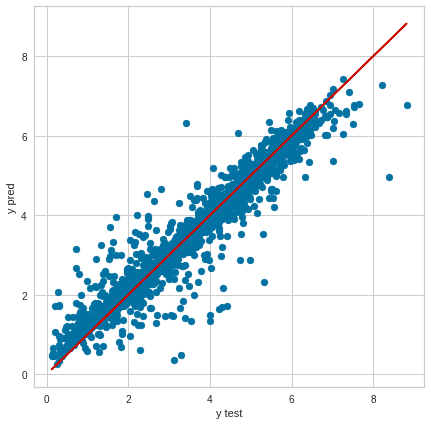

In [345]:
model_GB_3 = model_pipeline(GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                            subsample=0.2))
model_GB_3.fit(X_train, y_train)
 
scoring(model_GB_3)

plot_dist(model_GB_3)

## SGDRegressor

score train = 0.9293526349983837
score test = 0.9262671120126338
R2 adjusted = 0.9261508751949974
MAE =  0.2811035144755066
MSE =  0.22545933516986305
RMSE =  0.47482558394621394
R2 =  0.9262671120126338


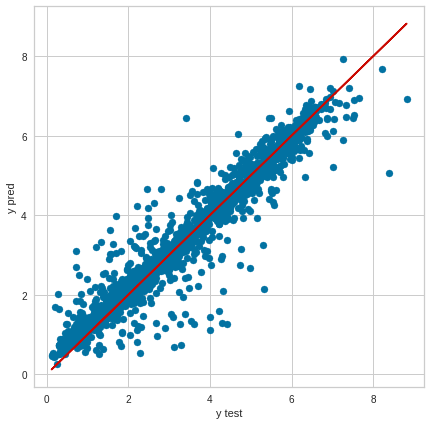

In [346]:
model_SGDR_3 = model_pipeline(SGDRegressor())

model_SGDR_3.fit(X_train, y_train)

scoring(model_SGDR_3)

plot_dist(model_SGDR_3)


In [347]:
model_SGDR_2 = model_pipeline(SGDRegressor())

param_grid = {
    'linear__alpha': 10.0 ** -np.arange(1, 7),
    'linear__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'linear__penalty': ['l2', 'l1', 'elasticnet'],
    'linear__learning_rate': ['constant', 'optimal', 'invscaling'],
}

grid_SGDR_2 = GridSearchCV(model_SGDR_2, param_grid)

grid_SGDR_2.fit(X_train, y_train)


/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'

/home/omar/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear', SGDRegressor())]),
             param_grid={'linear__alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'linear__learning_rate': ['constant', 'optimal',
                                                   'invscaling'],
                         'linear__loss': ['squared_loss', 'huber',
                                          'epsilon_insensitive'],
                         'linear__penalty': ['l2', 'l1', 'elasticnet']})

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear',
                 SGDRegressor(alpha=0.001, loss='squared_loss', penalty='l1'))])

 The best score across ALL searched params:
 0.9289704052047074

 The best parameters across ALL searched params:
 {'linear__alpha': 0.001, 'linear__learning_rate': 'invscaling', 'linear__loss': 'squared_loss', 'linear__penalty': 'l1'}
score train = 0.9291863477393049
score test = 0.9262066263288126
R2 adjusted = 0.9260902941580225
MAE =  0.2857478244892719
MSE =  0.22564428739991757
RMSE =  0.4750203020923606
R2 =  0.9262066263288126


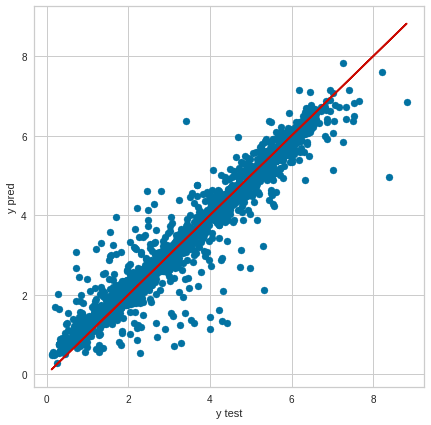

In [348]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_SGDR_2.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_SGDR_2.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_SGDR_2.best_params_)

scoring(grid_SGDR_2)

plot_dist(grid_SGDR_2)


## Lasso

In [349]:
param = {'linear__alpha' : [1e-5, 0.01, 0.1, 0.5, 0.8, 1]}
grid_lasso = model_pipeline(Lasso())

grid_lasso = GridSearchCV(estimator=grid_lasso, param_grid = param, cv = 3, n_jobs=-1)
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('linear', Lasso())]),
             n_jobs=-1,
             param_grid={'linear__alpha': [1e-05, 0.01, 0.1, 0.5, 0.8, 1]})

In [350]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_lasso.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_lasso.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_lasso.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear', Lasso(alpha=1e-05))])

 The best score across ALL searched params:
 0.9292001650459257

 The best parameters across ALL searched params:
 {'linear__alpha': 1e-05}


score train = 0.9295769662601873
score test = 0.9261726402205792
R2 adjusted = 0.9260562544721093
MAE =  0.27910699475348655
MSE =  0.22574820961938388
RMSE =  0.4751296766351097
R2 =  0.9261726402205792


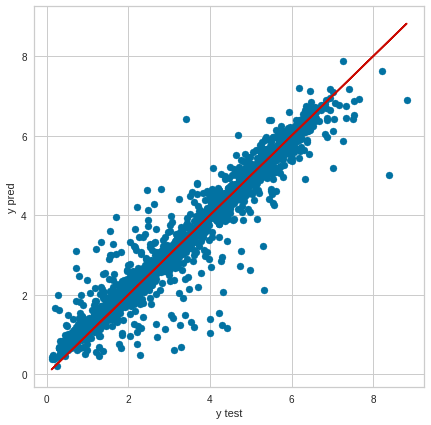

In [351]:
grid_model_lasso = model_pipeline(Lasso(alpha=1e-05))

grid_model_lasso.fit(X_train, y_train)

scoring(grid_model_lasso)
plot_dist(grid_model_lasso)

# ANN (Tmoy, Hmoy)

In [41]:
X = df[['Relative Humidity (MOY) (% RH)',
       'Temperature (MOY) (�C)']]
y = df['ETP journali�re (mm)']

X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=3)

In [42]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [44]:
def scoring(model):
    y_pred = model.predict(X_test, verbose = 0)
    print("R2 test = ",r2_score(y_test,y_pred))
    print("R2 train = ",r2_score(y_train, model.predict(X_train, verbose = 0)))
    
    print('MAE = ', mean_absolute_error(y_test,y_pred))
    print('RMAE = ', np.sqrt(mean_absolute_error(y_test,y_pred)))
    print("MSE = ", mean_squared_error(y_test, y_pred))
    print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
   
    R2_adjusted = 1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("R2 adjusted =", R2_adjusted)

## 1

In [45]:
model = Sequential()

model.add(Dense(2,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [46]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=400,epochs=500)

Epoch 1/500
10/10 [==============================] - 1s 17ms/step - loss: 13.8480 - val_loss: 13.5843
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 12.9288 - val_loss: 12.5902
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 11.9146 - val_loss: 11.4041
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 10.6811 - val_loss: 9.9693
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 9.2037 - val_loss: 8.2719
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 7.5026 - val_loss: 6.4738
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 5.7834 - val_loss: 4.8090
Epoch 8/500
10/10 [==============================] - 0s 15ms/step - loss: 4.3007 - val_loss: 3.6196
Epoch 9/500
10/10 [==============================] - 0s 6ms/step - loss: 3.3661 - val_loss: 3.0954
Epoch 10/500
10/10 [==============================] - 0s 6ms/step - loss: 2.9802 - val_loss: 2.9634


Epoch 83/500
10/10 [==============================] - 0s 6ms/step - loss: 0.8089 - val_loss: 0.7603
Epoch 84/500
10/10 [==============================] - 0s 7ms/step - loss: 0.8043 - val_loss: 0.7549
Epoch 85/500
10/10 [==============================] - 0s 6ms/step - loss: 0.8006 - val_loss: 0.7503
Epoch 86/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7941 - val_loss: 0.7461
Epoch 87/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7920 - val_loss: 0.7422
Epoch 88/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7889 - val_loss: 0.7392
Epoch 89/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7839 - val_loss: 0.7361
Epoch 90/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7805 - val_loss: 0.7338
Epoch 91/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7777 - val_loss: 0.7311
Epoch 92/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7754 - val_loss: 0.7294


10/10 [==============================] - 0s 7ms/step - loss: 0.7182 - val_loss: 0.6812
Epoch 246/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7167 - val_loss: 0.6804
Epoch 247/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7166 - val_loss: 0.6818
Epoch 248/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7171 - val_loss: 0.6847
Epoch 249/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7194 - val_loss: 0.6791
Epoch 250/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7153 - val_loss: 0.6789
Epoch 251/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7149 - val_loss: 0.6784
Epoch 252/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7149 - val_loss: 0.6778
Epoch 253/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7147 - val_loss: 0.6782
Epoch 254/500
10/10 [==============================] - 0s 9ms/step - loss: 0.7146 - val_loss: 0.6773
Epoc

10/10 [==============================] - 0s 6ms/step - loss: 0.6772 - val_loss: 0.6452
Epoch 408/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6784 - val_loss: 0.6503
Epoch 409/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6807 - val_loss: 0.6462
Epoch 410/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6771 - val_loss: 0.6453
Epoch 411/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6755 - val_loss: 0.6453
Epoch 412/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6760 - val_loss: 0.6468
Epoch 413/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6774 - val_loss: 0.6509
Epoch 414/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6765 - val_loss: 0.6451
Epoch 415/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6792 - val_loss: 0.6480
Epoch 416/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6759 - val_loss: 0.6445
Epoc

<AxesSubplot:>

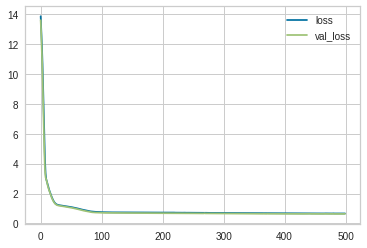

In [47]:
pd.DataFrame(model.history.history).plot()

In [48]:
scoring(model)

R2 test =  0.787392114801467
R2 train =  0.7767597710174761
MAE =  0.6366182032366604
RMAE =  0.7978835774952762
MSE =  0.6495816292344285
RMSE =  0.8059662705314835
R2 adjusted = 0.7871687871909643


60/60 [==============================] - 0s 2ms/step


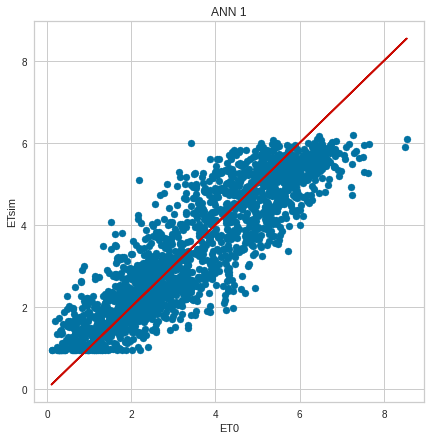

In [49]:
plot_dist(model, 'ANN 1')

## 2

In [361]:
PF = PolynomialFeatures(degree=2)

X_train_1 = PF.fit_transform(X_train)
X_test_1 = PF.fit_transform(X_test)

In [362]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [363]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=400,epochs=500)

Epoch 1/500
10/10 [==============================] - 1s 19ms/step - loss: 15.2540 - val_loss: 14.2609
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 13.0436 - val_loss: 12.2600
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 11.2310 - val_loss: 10.3410
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 9.2835 - val_loss: 8.1564
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 7.0546 - val_loss: 5.7393
Epoch 6/500
10/10 [==============================] - 0s 8ms/step - loss: 4.8571 - val_loss: 3.7355
Epoch 7/500
10/10 [==============================] - 0s 10ms/step - loss: 3.2692 - val_loss: 2.5989
Epoch 8/500
10/10 [==============================] - 0s 9ms/step - loss: 2.4937 - val_loss: 2.1826
Epoch 9/500
10/10 [==============================] - 0s 7ms/step - loss: 2.1837 - val_loss: 1.9955
Epoch 10/500
10/10 [==============================] - 0s 7ms/step - loss: 1.9920 - val_loss: 1.8202
E

Epoch 83/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6574 - val_loss: 0.6843
Epoch 84/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6570 - val_loss: 0.6826
Epoch 85/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6570 - val_loss: 0.6822
Epoch 86/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6572 - val_loss: 0.6822
Epoch 87/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6574 - val_loss: 0.6843
Epoch 88/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6564 - val_loss: 0.6829
Epoch 89/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6559 - val_loss: 0.6815
Epoch 90/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6561 - val_loss: 0.6874
Epoch 91/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6572 - val_loss: 0.6822
Epoch 92/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6567 - val_loss: 0.6806


10/10 [==============================] - 0s 6ms/step - loss: 0.6483 - val_loss: 0.6776
Epoch 165/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6492 - val_loss: 0.6792
Epoch 166/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6476 - val_loss: 0.6771
Epoch 167/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6485 - val_loss: 0.6779
Epoch 168/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6489 - val_loss: 0.6789
Epoch 169/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6489 - val_loss: 0.6789
Epoch 170/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6489 - val_loss: 0.6772
Epoch 171/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6481 - val_loss: 0.6765
Epoch 172/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6481 - val_loss: 0.6815
Epoch 173/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6498 - val_loss: 0.6772
Epoc

10/10 [==============================] - 0s 8ms/step - loss: 0.6465 - val_loss: 0.6815
Epoch 327/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6465 - val_loss: 0.6815
Epoch 328/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6481 - val_loss: 0.6754
Epoch 329/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6454 - val_loss: 0.6772
Epoch 330/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6459 - val_loss: 0.6769
Epoch 331/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6474 - val_loss: 0.6751
Epoch 332/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6438 - val_loss: 0.6976
Epoch 333/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6528 - val_loss: 0.6759
Epoch 334/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6426 - val_loss: 0.6766
Epoch 335/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6431 - val_loss: 0.6762
Epoc

10/10 [==============================] - 0s 7ms/step - loss: 0.6441 - val_loss: 0.6755
Epoch 489/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6423 - val_loss: 0.6748
Epoch 490/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6418 - val_loss: 0.6766
Epoch 491/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6412 - val_loss: 0.6761
Epoch 492/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6417 - val_loss: 0.6761
Epoch 493/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6407 - val_loss: 0.6782
Epoch 494/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6424 - val_loss: 0.6755
Epoch 495/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6410 - val_loss: 0.6806
Epoch 496/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6423 - val_loss: 0.6777
Epoch 497/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6416 - val_loss: 0.6754
Epoc

<AxesSubplot:>

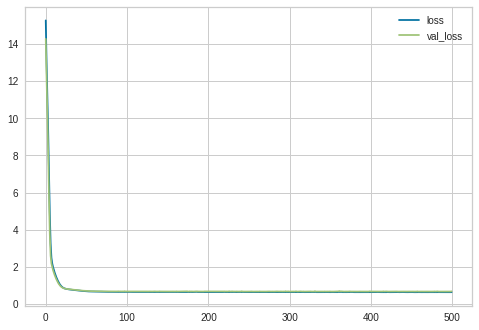

In [364]:
pd.DataFrame(model.history.history).plot()

R2 test =  0.775936737907406
R2 train =  0.7871031453593335
MAE =  0.6509534520020208
RMAE =  0.8068168639796895
MSE =  0.6878269088441674
RMSE =  0.8293533076103136
R2 adjusted = 0.7757013773379811
60/60 [==============================] - 0s 1ms/step


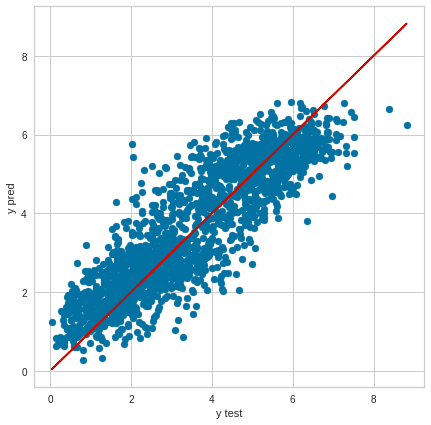

In [365]:
scoring(model)

plot_dist(model)

## 3

In [366]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [367]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=400,epochs=500)

Epoch 1/500
10/10 [==============================] - 1s 28ms/step - loss: 14.2090 - val_loss: 13.9593
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 13.1119 - val_loss: 12.6419
Epoch 3/500
10/10 [==============================] - 0s 13ms/step - loss: 11.6555 - val_loss: 10.8406
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 9.6853 - val_loss: 8.5162
Epoch 5/500
10/10 [==============================] - 0s 10ms/step - loss: 7.2603 - val_loss: 5.7952
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 4.7005 - val_loss: 3.2539
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 2.7213 - val_loss: 2.0534
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 2.0203 - val_loss: 1.6932
Epoch 9/500
10/10 [==============================] - 0s 10ms/step - loss: 1.6658 - val_loss: 1.4503
Epoch 10/500
10/10 [==============================] - 0s 10ms/step - loss: 1.4494 - val_loss: 1.271

Epoch 83/500
10/10 [==============================] - 0s 10ms/step - loss: 0.6484 - val_loss: 0.6723
Epoch 84/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6471 - val_loss: 0.6735
Epoch 85/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6483 - val_loss: 0.6722
Epoch 86/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6461 - val_loss: 0.6740
Epoch 87/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6477 - val_loss: 0.6755
Epoch 88/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6477 - val_loss: 0.6746
Epoch 89/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6460 - val_loss: 0.6731
Epoch 90/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6478 - val_loss: 0.6738
Epoch 91/500
10/10 [==============================] - 0s 10ms/step - loss: 0.6464 - val_loss: 0.6723
Epoch 92/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6484 - val_loss: 0.671

10/10 [==============================] - 0s 7ms/step - loss: 0.6523 - val_loss: 0.6828
Epoch 246/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6460 - val_loss: 0.6718
Epoch 247/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6455 - val_loss: 0.6747
Epoch 248/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6439 - val_loss: 0.6705
Epoch 249/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6434 - val_loss: 0.6723
Epoch 250/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6434 - val_loss: 0.6741
Epoch 251/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6433 - val_loss: 0.6711
Epoch 252/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6437 - val_loss: 0.6710
Epoch 253/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6434 - val_loss: 0.6706
Epoch 254/500
10/10 [==============================] - 0s 13ms/step - loss: 0.6455 - val_loss: 0.6709
Epo

10/10 [==============================] - 0s 6ms/step - loss: 0.6554 - val_loss: 0.6798
Epoch 408/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6464 - val_loss: 0.6702
Epoch 409/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6418 - val_loss: 0.6777
Epoch 410/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6454 - val_loss: 0.6751
Epoch 411/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6418 - val_loss: 0.6708
Epoch 412/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6411 - val_loss: 0.6709
Epoch 413/500
10/10 [==============================] - 0s 11ms/step - loss: 0.6414 - val_loss: 0.6742
Epoch 414/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6431 - val_loss: 0.6717
Epoch 415/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6428 - val_loss: 0.6708
Epoch 416/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6413 - val_loss: 0.6709
Epo

10/10 [==============================] - 0s 7ms/step - loss: 0.6394 - val_loss: 0.6717
Epoch 489/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6393 - val_loss: 0.6721
Epoch 490/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6407 - val_loss: 0.6725
Epoch 491/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6444 - val_loss: 0.6805
Epoch 492/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6445 - val_loss: 0.6711
Epoch 493/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6404 - val_loss: 0.6784
Epoch 494/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6419 - val_loss: 0.6727
Epoch 495/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6417 - val_loss: 0.6731
Epoch 496/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6396 - val_loss: 0.6732
Epoch 497/500
10/10 [==============================] - 0s 8ms/step - loss: 0.6397 - val_loss: 0.6727
Epoc

<AxesSubplot:>

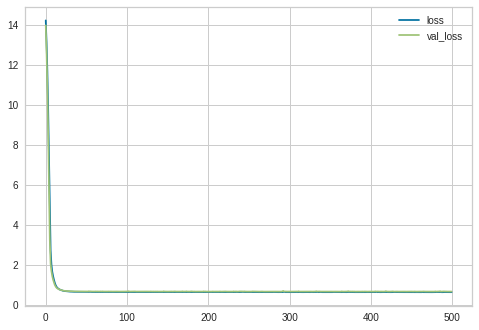

In [368]:
pd.DataFrame(model.history.history).plot()

R2 test =  0.7810359982770604
R2 train =  0.7882949747780812
MAE =  0.6446029283572818
RMAE =  0.802871676145872
MSE =  0.672173256100321
RMSE =  0.8198617298668849
R2 adjusted = 0.7808059940735699
60/60 [==============================] - 0s 2ms/step


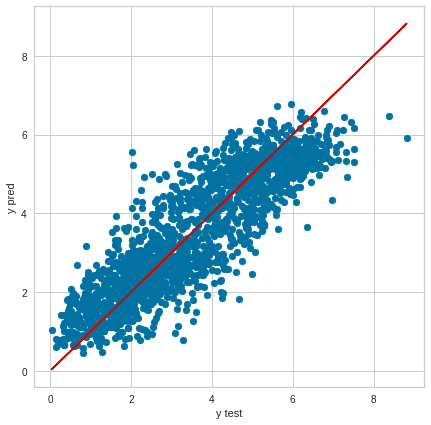

In [369]:
scoring(model)

plot_dist(model)